In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

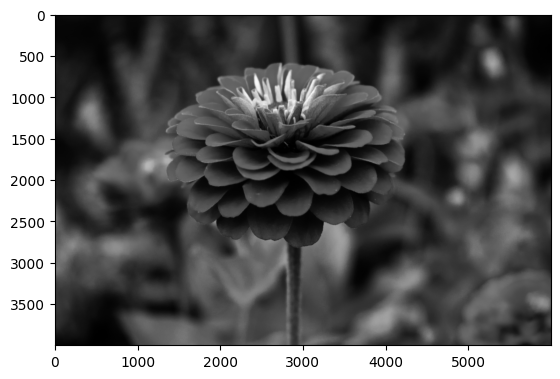

In [30]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")
plt.show()

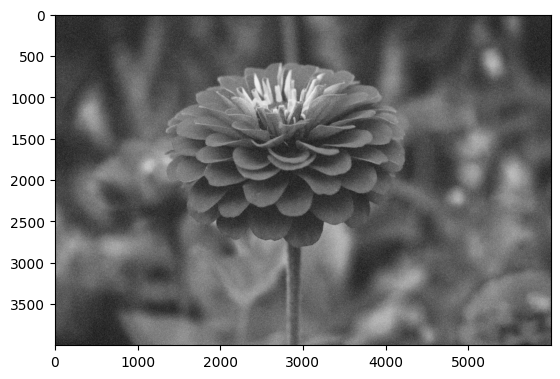

In [ ]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray,noise_gauss, cv2.COLOR_BGR2GRAY)
plt.imshow(image_noise_gauss, cmap = "gray")

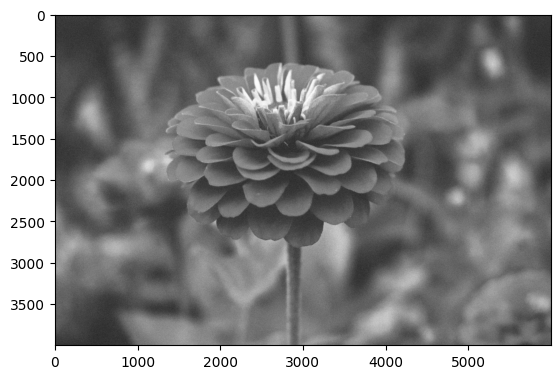

In [23]:
uniform_noise = np.random.randint(0, 100, image_gray.shape).astype("uint8")
image_noise_uniform = cv2.add(image_gray, uniform_noise, cv2.COLOR_BGR2GRAY)
plt.imshow(image_noise_uniform, cmap = "gray")

In [ ]:
from skimage.metrics import structural_similarity, mean_squared_error

image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(3,3),0)
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)
image_gauss_fastNl = cv2.fastNlMeansDenoising(image_noise_gauss, h=25, templateWindowSize=3)

images = {'Медианный': image_gauss_median, 'Гаусcа': image_gauss_gauss, 'Билатериальный': image_gauss_bilat, 'Cредних': image_gauss_fastNl}

def get_res(filter) -> list:
    if len(filter.shape) == 3:
        filter = cv2.cvtColor(filter, cv2.COLOR_BGR2GRAY)
    mse_sp_median = mean_squared_error(image_gray, filter)
    (ssim_sp_median, diff) = structural_similarity(image_gray, filter, full=True)
    return [mse_sp_median, ssim_sp_median]

images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

for i, k in enumerate(images_place, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSM {k[1][1]}')

1: Cредних, MSE 0.14777345833333333, SSM 0.9999661923473938
2: Билатериальный, MSE 986.8801512916667, SSM 0.7171325128334659
3: Гаусcа, MSE 1928.1514510416666, SSM 0.4309922601542279
4: Медианный, MSE 3365.2173615833335, SSM 0.1600372331640447


In [37]:
from skimage.metrics import structural_similarity, mean_squared_error

image_gauss_median = cv2.medianBlur(image_noise_uniform, 3)
image_gauss_gauss = cv2.GaussianBlur(image_noise_uniform,(3,3),0)
image_gauss_bilat = cv2.bilateralFilter(image_noise_uniform,9,75,75)
image_gauss_fastNl = cv2.fastNlMeansDenoising(image_noise_uniform, h=25, templateWindowSize=5)

images = {'Медианный': image_gauss_median, 'Гаусcа': image_gauss_gauss, 'Билатериальный': image_gauss_bilat, 'Cредних': image_gauss_fastNl}

def get_res(filter) -> list:
    if len(filter.shape) == 3:
        filter = cv2.cvtColor(filter, cv2.COLOR_BGR2GRAY)
    mse_sp_median = mean_squared_error(image_gray, filter)
    (ssim_sp_median, diff) = structural_similarity(image_gray, filter, full=True)
    return [mse_sp_median, ssim_sp_median]
images_place = sorted(((k, get_res(v)) for k, v in images.items()), key=lambda x: x[1][1], reverse=True)

for i, k in enumerate(images_place, 1):
    print(f'{i}: {k[0]}, MSE {k[1][0]}, SSM {k[1][1]}')

1: Cредних, MSE 2473.74911375, SSM 0.539697527285175
2: Билатериальный, MSE 2491.169019958333, SSM 0.4832178665535128
3: Гаусcа, MSE 2571.4345871666665, SSM 0.30265445926590634
4: Медианный, MSE 2682.1224839583333, SSM 0.1949866467282408
